In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as wb
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf

     |████████████████████████████████| 6.4 MB 37.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


### Importing Data

In [ ]:
stocks = input().split()
assets = [stock.upper() + '.NS' for stock in stocks]
assets

# RELIANCE INFY KOTAKBANK ASIANPAINT TITAN ITC

['RELIANCE.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'ASIANPAINT.NS',
 'TITAN.NS',
 'ITC.NS']

In [ ]:
assets.sort()
assets

['ASIANPAINT.NS',
 'INFY.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'RELIANCE.NS',
 'TITAN.NS']

In [ ]:
years = float(input('No. of years data you want to analyze: '))
years

5.0

In [ ]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days= 365 * years)
startDate

datetime.datetime(2017, 3, 31, 4, 51, 23, 390838)

In [ ]:
yf.pdr_override()

In [ ]:
pf_data = wb.get_data_yahoo(assets, start=startDate, end=endDate)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
pf_data

,ASIANPAINT.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TITAN.NS
Date,,,,,,
2017-03-31,1040.873779,447.008148,234.894028,870.307922,637.497864,449.838745
2017-04-03,1056.726929,441.126709,235.941559,874.049866,663.438965,446.533630
2017-04-05,1049.648682,435.507721,233.762711,887.919678,682.912781,478.029663
2017-04-06,1053.866577,437.103760,229.698380,892.409790,694.254517,473.800964
2017-04-07,1050.036255,429.210907,228.483246,871.205994,678.858887,471.856812
...,...,...,...,...,...,...
2022-03-24,3025.350098,1886.699951,254.850006,1714.150024,2578.649902,2618.500000
2022-03-25,3046.949951,1876.550049,253.350006,1722.250000,2595.850098,2523.899902
2022-03-28,3027.449951,1873.900024,257.049988,1725.199951,2621.949951,2535.899902


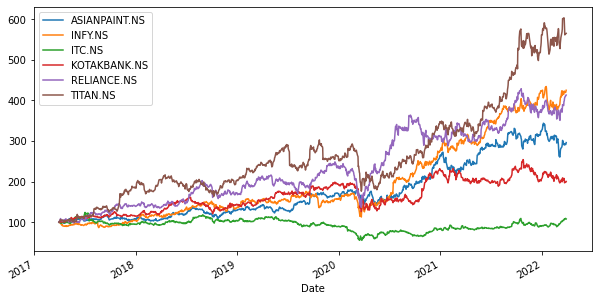

In [ ]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize= (10,5))
plt.show()

### Returns

In [ ]:
returns = (pf_data / pf_data.shift(1)) - 1
returns

,ASIANPAINT.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TITAN.NS
Date,,,,,,
2017-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-03,0.015231,-0.013157,0.004460,0.004300,0.040692,-0.007347
2017-04-05,-0.006698,-0.012738,-0.009235,0.015868,0.029353,0.070535
2017-04-06,0.004018,0.003665,-0.017387,0.005057,0.016608,-0.008846
2017-04-07,-0.003635,-0.018057,-0.005290,-0.023760,-0.022176,-0.004103
...,...,...,...,...,...,...
2022-03-24,0.002834,0.007637,0.011310,-0.031417,0.015536,-0.026580
2022-03-25,0.007140,-0.005380,-0.005886,0.004725,0.006670,-0.036128
2022-03-28,-0.006400,-0.001412,0.014604,0.001713,0.010054,0.004755


In [ ]:
annual_returns = returns.mean() * 250 *100
annual_returns.values.sort()
annual_returns

ASIANPAINT.NS     5.293690
INFY.NS          18.494365
ITC.NS           25.471122
KOTAKBANK.NS     33.268315
RELIANCE.NS      33.584347
TITAN.NS         40.669218
dtype: float64

In [ ]:
num_assets = len(assets)

### Random Weights

In [ ]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.20011363, 0.11291694, 0.21331534, 0.23780774, 0.12693282,
       0.10891353])

### Mean Annual Returns

In [ ]:
np.sum(weights * returns.mean()) * 250

0.23073387455007707

### Annual Variance

In [ ]:
np.dot(weights.T, np.dot(returns.cov() * 250, weights))

0.03562654416068749

### Annual covariance

In [ ]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights)))

0.18874995141903345

### Correlation

In [ ]:
corr_matrix = returns.corr()
corr_matrix

,ASIANPAINT.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TITAN.NS
ASIANPAINT.NS,1.000000,0.228675,0.238765,0.372645,0.367520,0.350311
INFY.NS,0.228675,1.000000,0.184588,0.269203,0.278534,0.191406
ITC.NS,0.238765,0.184588,1.000000,0.310956,0.259314,0.252739
KOTAKBANK.NS,0.372645,0.269203,0.310956,1.000000,0.376198,0.341764
RELIANCE.NS,0.367520,0.278534,0.259314,0.376198,1.000000,0.318684
TITAN.NS,0.350311,0.191406,0.252739,0.341764,0.318684,1.000000


# Prediction Functions:

In [ ]:
# Importing Required Library

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
## Scaling the data set as required

def Scale_data_set(data):

  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  return training_data_len, scaled_data, dataset, scaler

In [ ]:
## Creating a dataSet to be trained by LSTM

def Creating_training_data(training_data_len, scaled_data):
  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  # x_train.shape

  return x_train, y_train

In [ ]:
## Training by  LSTM

def LSTM_model(x_train, y_train):
  
  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  return model

In [ ]:
## Predicting data using the trained value

def miscellaneous(model, training_data_len, scaled_data, dataset, scaler):
  # Create the testing data set
  # Create a new array containing scaled values from index 1543 to 2002 
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

  return predictions, rmse

In [ ]:
## Ploting the chart with predicted values

def Ploting_Prediction(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price in Rs', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

  return train, valid

def plot_graph_plotly(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions

  #Max Sharpe Ratio
  train_data = go.Scatter(
      name='Training data',
      
      x=data.index,
      y=train['Close'],
      marker=dict(color='blue',size=5,)
  )

  #Min Vol
  Val_data = go.Scatter(
      name='Actual Value',
     
      x=valid.index,
      y=valid['Close'],
      marker=dict(color='green',size=5,)
  )

  #Random portfolio
  Prediction_data = go.Scatter(
      name='Predicted Data',
      
      x=valid.index,
      y=valid['Predictions'],
      marker=dict(color='red',size=5,)
  )

  data = [train_data, Val_data, Prediction_data]

  layout = go.Layout(
      title = title,
      yaxis = dict(title='Close Price in Rs'),
      xaxis = dict(title='Date'),
      showlegend = True,
      legend = dict(
          x = .83, y = 0, traceorder='normal',
          bgcolor='#E2E2E2',
          bordercolor='black',
          borderwidth=2),
      width=980,
      height=500)

  fig = go.Figure(data=data, layout=layout)
  fig.show()

  return train, valid

In [ ]:
##  Compiling all functions to one functions

def Stock_prediction(data, title):
  training_data_len, scaled_data, dataset, scaler = Scale_data_set(data)
  x_train, y_train = Creating_training_data(training_data_len, scaled_data)
  model = LSTM_model(x_train, y_train)
  predictions, rmse = miscellaneous(model, training_data_len, scaled_data, dataset, scaler)
  train, valid = plot_graph_plotly(predictions ,training_data_len, data, title)

  return train, valid, rmse, predictions 

## Sending Data for Prediction:

In [ ]:
data = {}
for st in assets:
  data['{}'.format(st)] = pf_data.filter([st])

In [ ]:
pf_data

,ASIANPAINT.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TITAN.NS
Date,,,,,,
2017-03-31,1040.873779,447.008148,234.894028,870.307922,637.497864,449.838745
2017-04-03,1056.726929,441.126709,235.941559,874.049866,663.438965,446.533630
2017-04-05,1049.648682,435.507721,233.762711,887.919678,682.912781,478.029663
2017-04-06,1053.866577,437.103760,229.698380,892.409790,694.254517,473.800964
2017-04-07,1050.036255,429.210907,228.483246,871.205994,678.858887,471.856812
...,...,...,...,...,...,...
2022-03-24,3025.350098,1886.699951,254.850006,1714.150024,2578.649902,2618.500000
2022-03-25,3046.949951,1876.550049,253.350006,1722.250000,2595.850098,2523.899902
2022-03-28,3027.449951,1873.900024,257.049988,1725.199951,2621.949951,2535.899902


In [ ]:
for i in assets:
  DATA = data[i]
  DATA = DATA.rename(columns = {i:"Close"})
  train, valid, rmse, predictions = Stock_prediction(DATA, i)
  print("'root mean squared error' of {} = ".format(i) + str(rmse))


### 5000 Random weights

In [ ]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    pfolio_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_weights = pfolio_weights.tolist()

# pfolio_returns, pfolio_volatilities, pfolio_weights

In [ ]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


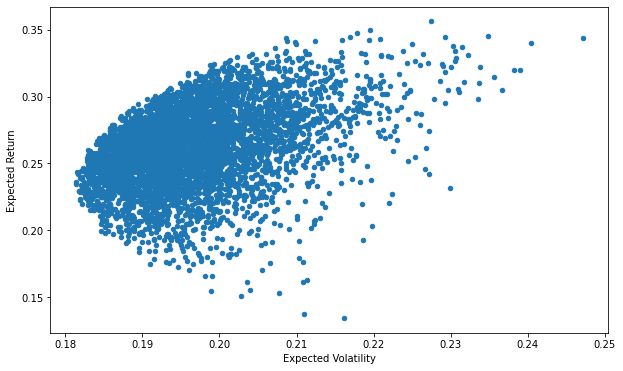

In [ ]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

In [ ]:
max_return = max(pfolio_returns)
max_return


0.3561874988517501

In [ ]:
max_rindex = np.where(pfolio_returns == max_return)
print(max_rindex)

(array([3843]),)


In [ ]:
max_rvolatility = pfolio_volatilities[max_rindex[0][0]]
max_rvolatility

0.22747313900869315

In [ ]:
max_rweights = pfolio_weights[max_rindex[0][0]]
max_rweights

array([3.97282170e-02, 4.85838251e-01, 2.90253502e-03, 3.36771144e-02,
       2.21495101e-04, 4.37632387e-01])

In [ ]:
min_volatility = pfolio_volatilities.min()

min_volatility

0.18137257839142182

In [ ]:
min_vindex = np.where(pfolio_volatilities == min_volatility)
min_vindex

(array([2734]),)

In [ ]:
min_vreturns = pfolio_returns[min_vindex[0][0]]
min_vreturns

0.2358803529519963

In [ ]:
min_vweights = pfolio_weights[min_vindex[0][0]]
min_vweights

array([0.23719442, 0.2640705 , 0.25947681, 0.0874021 , 0.05711625,
       0.09473993])

In [ ]:
max_sr = []
max_sr =  [str(round(max_return * 100,3) ) + '%', str(round(max_rvolatility * 100,3)) + '%']
for i in range(num_assets):
    max_sr.append(str(round(max_rweights[i] * 100,3)) + '%')
max_sr

['35.619%',
 '22.747%',
 '3.973%',
 '48.584%',
 '0.29%',
 '3.368%',
 '0.022%',
 '43.763%']

In [ ]:
min_vol = []
min_vol =  [str(round(min_vreturns*100,3)) + '%', str(round(min_volatility * 100,3)) + '%']
for i in range(num_assets):
    min_vol.append(str(round(min_vweights[i] *100,3)) + '%')
min_vol

['23.588%',
 '18.137%',
 '23.719%',
 '26.407%',
 '25.948%',
 '8.74%',
 '5.712%',
 '9.474%']

In [ ]:
#Max Sharpe Ratio
MaxSharpeRatio = go.Scatter(
    name='Maximium Return',
    mode='markers',
    x=[max_rvolatility],
    y=[max_return],
    marker=dict(color='red',size=14,line=dict(width=3, color='black'))
)

#Min Vol
MinVol = go.Scatter(
    name='Mininium Risk',
    mode='markers',
    x=[min_volatility],
    y=[min_vreturns],
    marker=dict(color='green',size=14,line=dict(width=3, color='black'))
)

#Random portfolio
EF_curve = go.Scatter(
    name='Random Portfolios',
    mode='markers',
    x= pfolio_volatilities,
    y= pfolio_returns,
    marker=dict(color='blue',size=5)
)

data = [MaxSharpeRatio, MinVol, EF_curve]

layout = go.Layout(
    title = 'Portfolio Optimisation with the Efficient Frontier',
    yaxis = dict(title='Annualised Return'),
    xaxis = dict(title='Annualised Volatility'),
    showlegend = True,
    legend = dict(
        x = .75, y = 0, traceorder='normal',
        bgcolor='#E2E2E2',
        bordercolor='black',
        borderwidth=2),
    width=800,
    height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Max Sharpe ratio and Min volatility table with required weights of stocks

In [ ]:
col = []
col =  ['Returns', 'Volatility']
for i in range(num_assets):
    col.append(pf_data.columns[i])

In [ ]:
result_table = pd.DataFrame(columns  = [col], index=['maximum Return', 'minimun risk'])
result_table.iloc[0] = max_sr
result_table.iloc[1] = min_vol

In [ ]:
result_table

,Returns,Volatility,ASIANPAINT.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TITAN.NS
maximum Return,35.619%,22.747%,3.973%,48.584%,0.29%,3.368%,0.022%,43.763%
minimun risk,23.588%,18.137%,23.719%,26.407%,25.948%,8.74%,5.712%,9.474%


### Correlation Graph

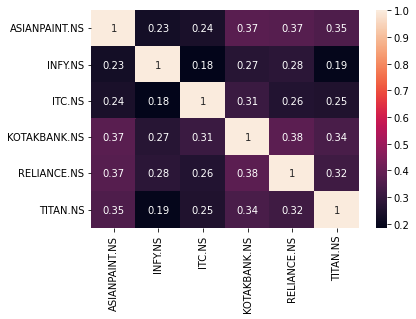

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
trace = go.Heatmap(
   x = assets,
   y = assets,
   z = corr_matrix,
   type = 'heatmap',
   colorscale = 'Viridis',
   hovertemplate = "%{z}"
)
layout = go.Layout(
    title = 'Correlation',
    yaxis = dict(title='Stocks'),
    xaxis = dict(title='Stocks'),
    showlegend = False,
    width=500,
    height=500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()